In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import math

general_data = pd.read_csv("DataLevel2.csv")
general_data.head()

,CurahHujan,WaterLevel,FlowMeter,FloodDiameterInMeter
0,4.30,5.4,7,3.0
1,4.60,5.8,7,5.0
2,4.50,5.4,6,3.0
3,2.44,3.7,5,0.0
4,1.98,3.2,5,0.0


In [3]:
general_data.describe()

,CurahHujan,WaterLevel,FlowMeter,FloodDiameterInMeter
count,30.000000,30.000000,30.000000,30.000000
mean,4.838333,5.916333,7.633333,4.150000
std,1.716685,1.710137,1.731719,3.721211
min,1.980000,3.200000,5.000000,0.000000
25%,3.250000,4.402500,6.000000,0.000000
50%,4.730000,5.680000,7.000000,3.750000
75%,5.960000,6.987500,9.000000,7.000000
max,8.450000,9.580000,11.000000,11.000000


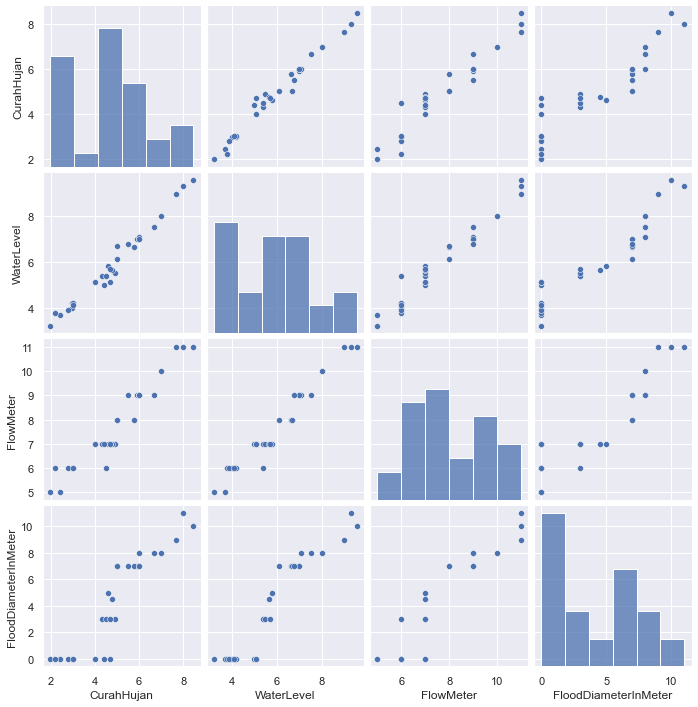

In [5]:
sns.set()
cols = ['CurahHujan', 'WaterLevel', 'FlowMeter', 'FloodDiameterInMeter']
sns.pairplot(general_data[cols], height = 2.5)
plt.show();

In [7]:
x = general_data.iloc[:, :-1].values
y = general_data.iloc[:, 3].values


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# drop the 1 column in X
RFE_regressor = LinearRegression()
#Initializing RFE model
rfe = RFE(RFE_regressor, 2)
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
RFE_regressor.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [8]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
#no of features
nof_list=np.arange(1,4)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.913794


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [9]:
#Initializing RFE model
rfe = RFE(RFE_regressor, 1)
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
RFE_regressor.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False]
[2 1 3]


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

print("score: ",regressor.score(x_train,y_train))
print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

score:  0.9180241852783745
Model slope:     [-2.4880632   4.89631265 -0.3681348 ]
Model intercept: -10.05284437546166


In [11]:
y_pred = regressor.predict(x_test)
print("score: ",regressor.score(x_test,y_test))
print("Model slope:    ", regressor.coef_)
print("Model intercept:", regressor.intercept_)

score:  0.8790957214841044
Model slope:     [-2.4880632   4.89631265 -0.3681348 ]
Model intercept: -10.05284437546166


In [12]:
y_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,3.0,2.982151
1,7.0,4.527195
2,0.0,-0.115712
3,8.0,6.956758
4,0.0,0.446965
5,0.0,0.772670
6,7.0,5.979752
7,3.0,2.133303
8,9.0,10.832877


D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


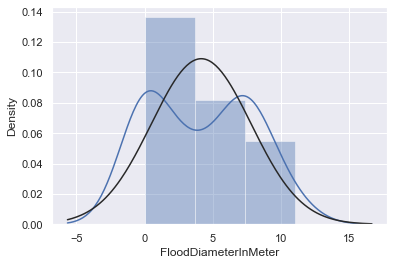

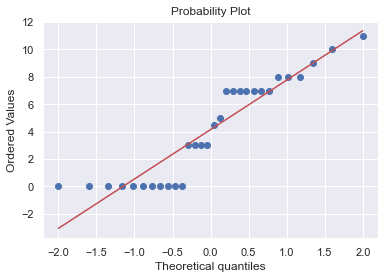

In [13]:
from scipy.stats import norm
from scipy import stats
sns.distplot(general_data['FloodDiameterInMeter'], fit=norm);
fig = plt.figure()
res = stats.probplot(general_data['FloodDiameterInMeter'], plot=plt)

In [15]:
Q1 = general_data.quantile(0.25)
Q3 = general_data.quantile(0.75)
IQR = Q3 - Q1
dataset_outl = general_data[~((general_data < (Q1 - 1.5 * IQR)) |(general_data > (Q3 + 1.5 * IQR))).any(axis=1)]
dataset_outl.shape

(30, 4)

D:\dimas\py\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


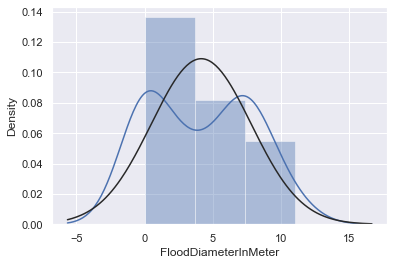

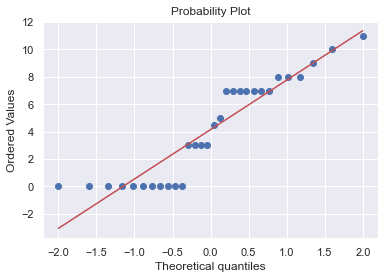

In [16]:
from scipy.stats import norm
from scipy import stats
sns.distplot(general_data['FloodDiameterInMeter'], fit=norm);
fig = plt.figure()
res = stats.probplot(general_data['FloodDiameterInMeter'], plot=plt)

In [17]:
general_data.describe()

,CurahHujan,WaterLevel,FlowMeter,FloodDiameterInMeter
count,30.000000,30.000000,30.000000,30.000000
mean,4.838333,5.916333,7.633333,4.150000
std,1.716685,1.710137,1.731719,3.721211
min,1.980000,3.200000,5.000000,0.000000
25%,3.250000,4.402500,6.000000,0.000000
50%,4.730000,5.680000,7.000000,3.750000
75%,5.960000,6.987500,9.000000,7.000000
max,8.450000,9.580000,11.000000,11.000000


In [18]:
x = general_data.iloc[:, :-1].values
y = general_data.iloc[:, 3].values


from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# drop the 1 column in X
RFE_regressor = LinearRegression()
#Initializing RFE model
rfe = RFE(RFE_regressor, 2)	# linear regression with 2 features
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
RFE_regressor.fit(x,y)
print(rfe.support_)
print(rfe.ranking_)

[ True  True False]
[1 1 2]


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [19]:
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
#no of features
nof_list=np.arange(1,4)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 1
Score with 1 features: 0.913794


D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
D:\dimas\py\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=3 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
